# Enter Student Name & ID

In [1]:
student_id =   400101323
student_name = "Mahdi Zinati" 

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400101323
your name: Mahdi Zinati


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [2]:
import numpy as np

In [3]:
def myPCA(X, num_components):
    mean = np.mean(X, axis=0)
    X_centered = X - mean
    cov_matrix = np.cov(X_centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, idx]
    top_eigenvectors = eigenvectors[:, :num_components]
    X_pca = np.dot(X_centered, top_eigenvectors)
    
    return X_pca

### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

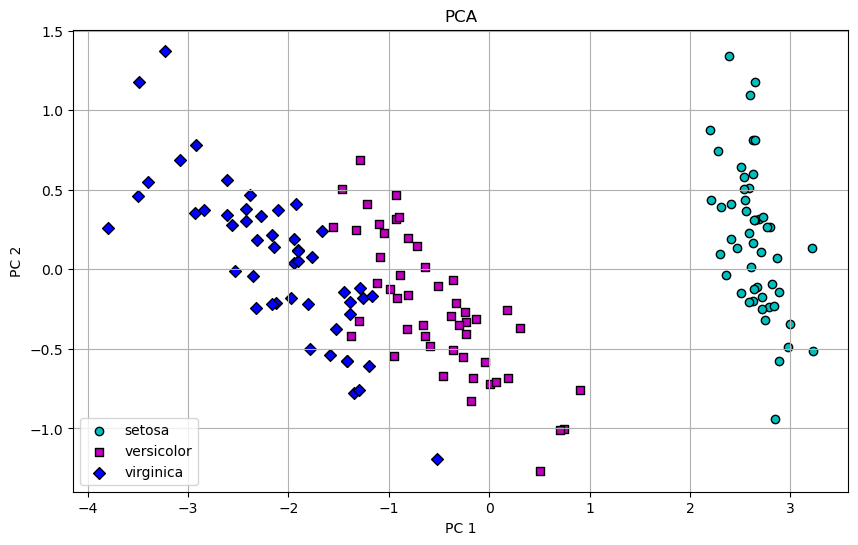

In [12]:
iris = load_iris()
X = iris.data
y = iris.target
X_pca = myPCA(X, 2)

plt.figure(figsize=(10, 6))
colors = ['c', 'm', 'b']
labels = iris.target_names

for i, color, marker, label in zip(np.unique(y), colors, markers, labels):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                color=color, label=label, marker=marker, edgecolor='k')

plt.title('PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.grid(True)
plt.show()

## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `
Eigenfaces are a series of eigenvectors employed in the realm of computer vision specifically aimed at facial recognition tasks. These eigenvectors are derived from the covariance matrix, which characterizes the distribution of facial image vectors in a high-dimensional space. The concept of eigenfaces can be elaborated as follows:

An eigenface symbolizes a standardized facial representation synthesized from the average of numerous facial images. Essentially, it constitutes an eigenvector pertaining to the covariance matrix of a collection of facial images. Moreover, each eigenface encapsulates distinct facial attributes, including large patches of brightness and darkness corresponding to facial structures such as eyes, nose, and mouth.

In the domain of face recognition, when PCA is employed on facial imagery, it extracts primary components referred to as eigenfaces. These initial principal components (i.e., eigenfaces) effectively encapsulate the highest variance within the dataset, thereby encoding the most significant facial features. By projecting facial images onto the subspace defined by a selection of eigenfaces, it becomes feasible to reduce data dimensionality while preserving critical facial characteristics necessary for accurate recognition tasks.

### 2.2 Read the given dataset and create train and test matrices. 
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

In [13]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/66/82/564168a349148298aca281e342551404ef5521f33fba17b388ead0a84dc5/opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 98.7 kB/s eta 0:00:0000:0100:17m


In [16]:
import os
import numpy as np

def read_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename), cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
        if img is not None:
            images.append(img.flatten())  # Flatten image and add to list
    return images

def create_train_test_sets(data_path):
    X_train, y_train, X_test, y_test = [], [], [], []
    
    for label, person_folder in enumerate(sorted(os.listdir(data_path))):
        folder_path = os.path.join(data_path, person_folder)
        images = read_images_from_folder(folder_path)
        
        # Splitting images into train and test sets
        train_images = images[:5]  # First five images for training
        test_images = images[5:10]  # Next five images for testing
        
        # Append to train and test sets
        X_train.extend(train_images)
        X_test.extend(test_images)
        y_train.extend([label] * len(train_images))  # Labeling with person's ID
        y_test.extend([label] * len(test_images))
    
    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

# Example usage:
data_path = 'ORL'
X_train, y_train, X_test, y_test = create_train_test_sets(data_path)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (200, 2304)
Test data shape: (200, 2304)


### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [17]:
from sklearn.decomposition import PCA
n = 50
pca = PCA(n_components=n)
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)
print("New training data shape:", pca_train.shape)
print("New test data shape:", pca_test.shape)

New training data shape: (200, 50)
New test data shape: (200, 50)


### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
lda = LDA()
lda.fit(pca_train, y_train)
y_prd = lda.predict(pca_test)
accuracy = accuracy_score(y_test, y_prd)
print("Accuracy: ", accuracy)


Accuracy:  0.925


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


Number of components: 40 Accuracy: 0.935
Number of components: 50 Accuracy: 0.925
Number of components: 60 Accuracy: 0.9
Number of components: 70 Accuracy: 0.91
Number of components: 80 Accuracy: 0.915
Number of components: 90 Accuracy: 0.92
Number of components: 100 Accuracy: 0.895


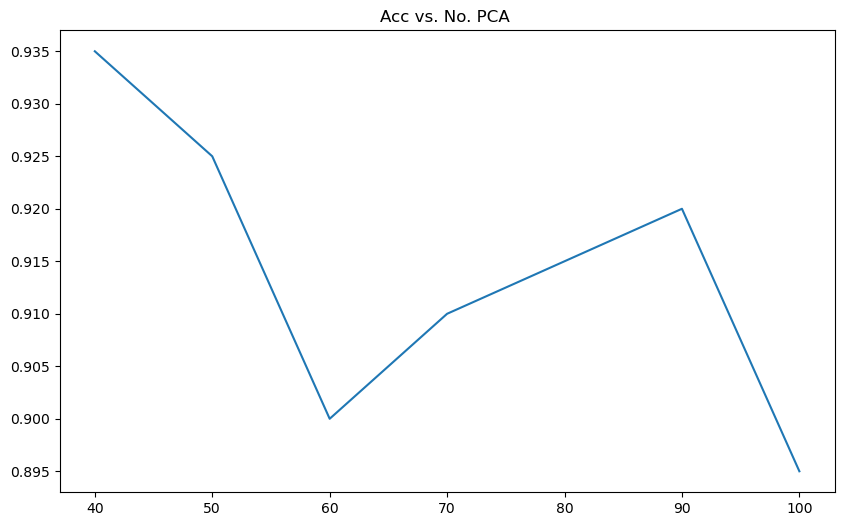

In [22]:
dims = range(40, 101, 10)
accs = []

for n in dims:
    pca = PCA(n_components=n)
    pca_train = pca.fit_transform(X_train)
    pca_test = pca.transform(X_test)
    lda = LDA()
    lda.fit(pca_train, y_train)
    y_pred = lda.predict(pca_test)
    
    acc = accuracy_score(y_test, y_pred)
    accs.append(acc)
    print("Number of components:", n, "Accuracy:" ,acc)

plt.figure(figsize=(10, 6))
plt.plot(dims, accs)
plt.title('Acc vs. No. PCA ')
plt.show()